In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans,AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as sch


In [3]:
# Load the dataset
wine_data = pd.read_csv('wine_dataset.csv', delimiter=';', decimal=',')


# Handle missing values
wine_data.isnull().sum()  # Check for missing values
wine_data = wine_data.dropna()  # Remove rows with missing values


In [4]:
# Standardize the data
scaler = StandardScaler()
wine_data_scaled = scaler.fit_transform(wine_data.drop('Id', axis=1))



Correlation Matrix:


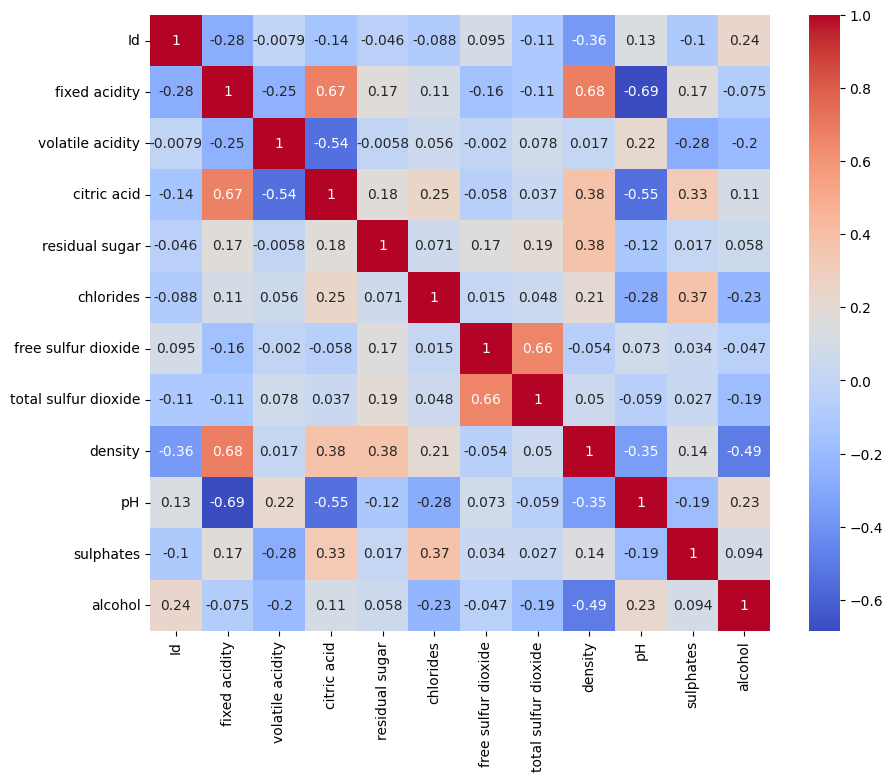

In [7]:
print("\nCorrelation Matrix:")


plt.figure(figsize=(10, 8))
sns.heatmap(wine_data.corr(), annot=True, cmap='coolwarm')
plt.show()

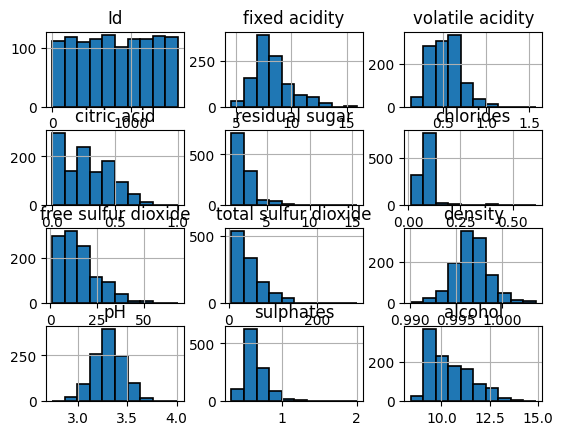

In [ ]:
# Exploratory Data Analysis
# Plot histograms for each feature
wine_data.hist(edgecolor='black', linewidth=1.2)
plt.show()

<Figure size 1200x1800 with 0 Axes>

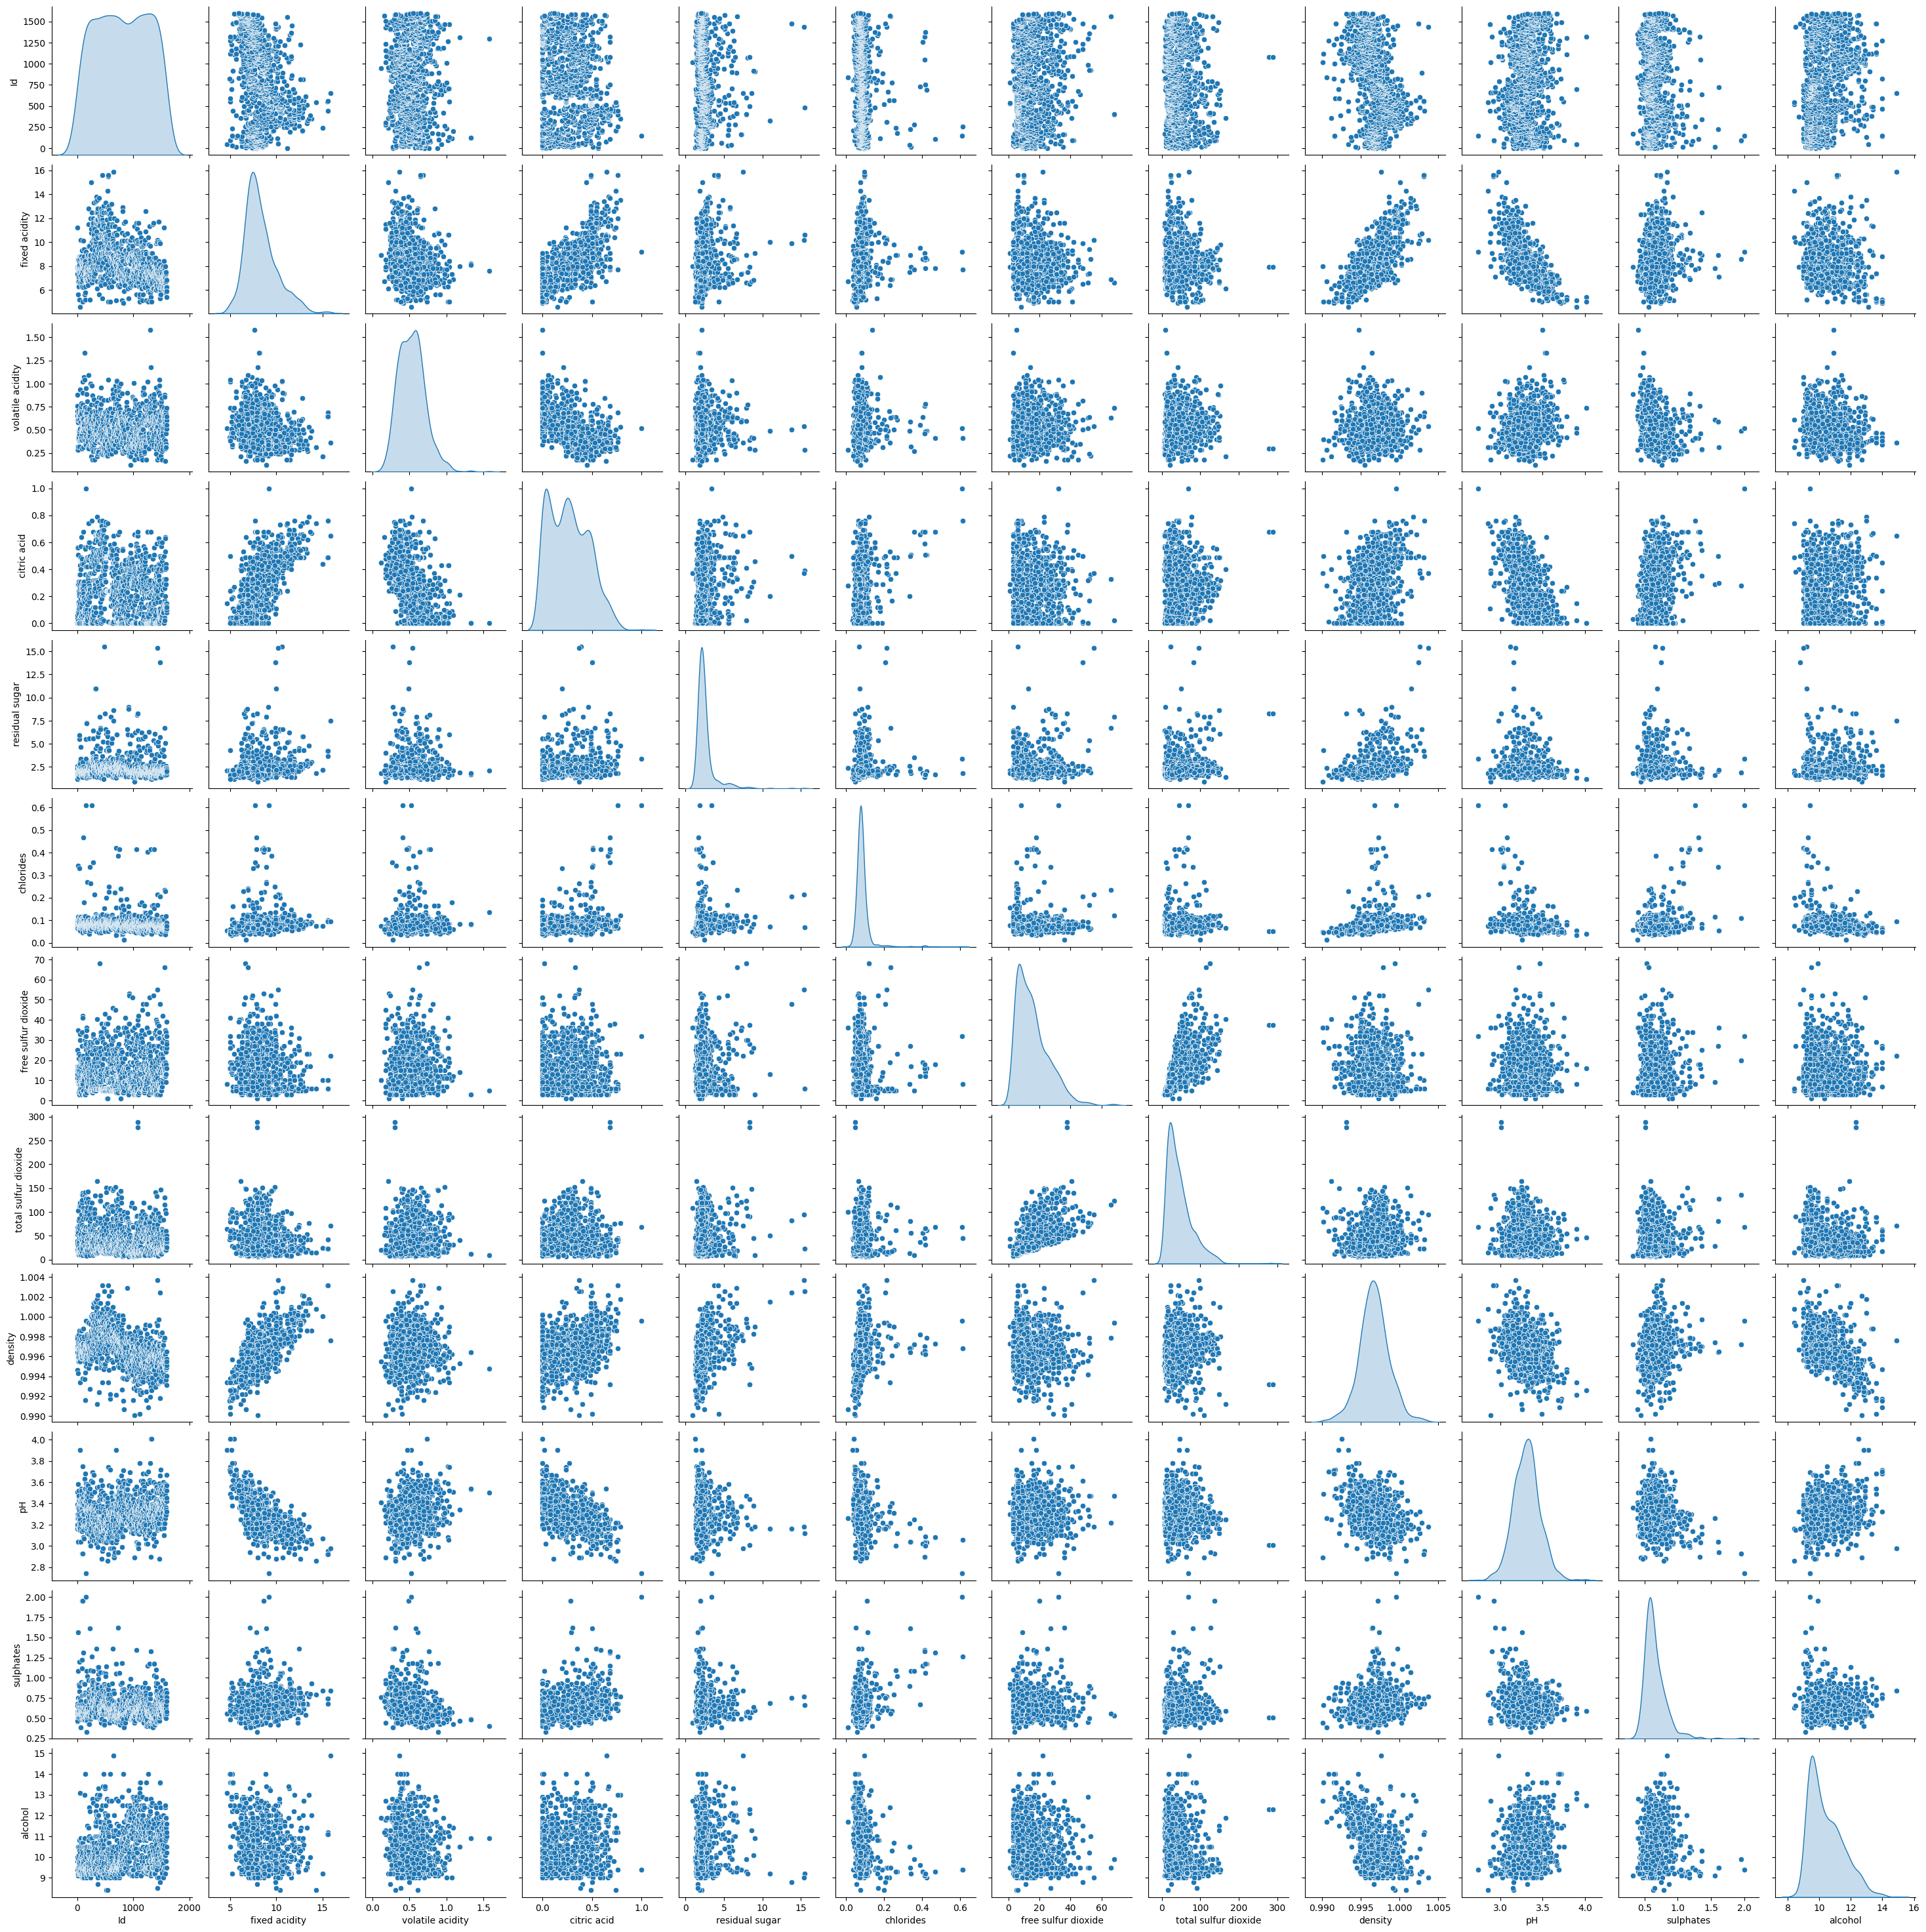

In [ ]:
# Plot scatter plots for each pair of features
plt.figure(figsize=(12,18))
sns.pairplot(wine_data, diag_kind='kde')
plt.show()

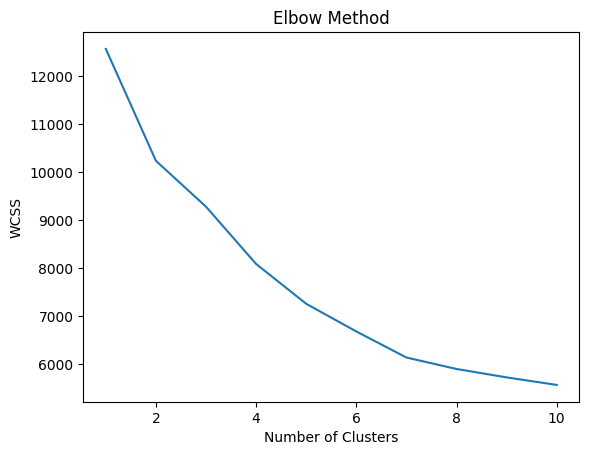

In [ ]:
# Clustering Analysis
# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(wine_data_scaled)

# Determine the optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(wine_data_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

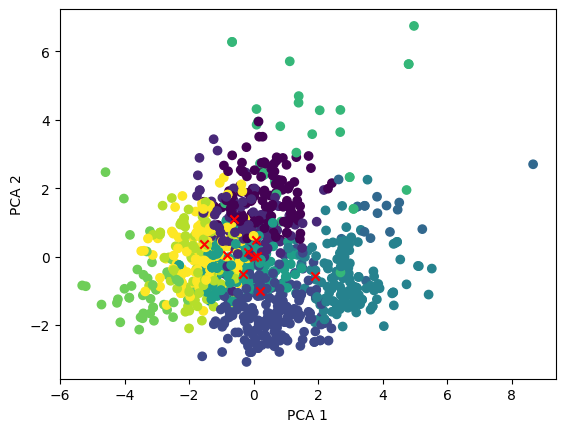

Silhouette Score: 0.14422166786039772


In [ ]:
# Analyze the characteristics of each cluster
pca = PCA(n_components=2)
pca_features = pca.fit_transform(wine_data_scaled)
cluster_labels = kmeans.labels_
center_labels = kmeans.cluster_centers_

plt.scatter(pca_features[:, 0], pca_features[:, 1], c=cluster_labels)
plt.scatter(center_labels[:, 0], center_labels[:, 1], c='red',marker='x')

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

# Evaluation
# Calculate silhouette score
silhouette_avg = silhouette_score(wine_data_scaled, cluster_labels)
print('Silhouette Score:', silhouette_avg)

In [ ]:
# Perform Agglomerative Clustering
agg_clustering = AgglomerativeClustering(n_clusters=3, linkage='ward')
cluster_labels_agg = agg_clustering.fit_predict(wine_data_scaled)


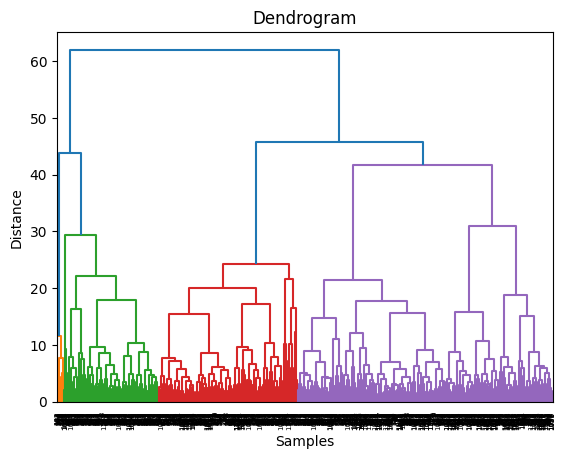

In [ ]:
# Plot the dendrogram
dendrogram = sch.dendrogram(sch.linkage(wine_data_scaled, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

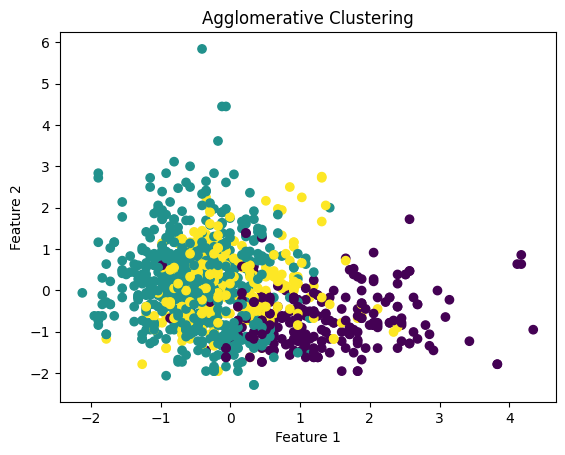

Silhouette Score: 0.1295758744168588


In [ ]:
# Plot the clusters
plt.scatter(wine_data_scaled[:, 0], wine_data_scaled[:, 1], c=cluster_labels_agg, cmap='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Agglomerative Clustering')
plt.show()
# Evaluation
# Calculate silhouette score
silhouette_avg_agg = silhouette_score(wine_data_scaled, cluster_labels_agg)
print('Silhouette Score:', silhouette_avg_agg)

In [ ]:
import numpy as np

# تعریف یک آرایه اسکالر
scalar_array = np.array(5)

# چاپ مقدار آرایه اسکالر
print(scalar_array)

# جمع کردن 10 به مقدار آرایه اسکالر
result = scalar_array + 10
print(result)

# تقسیم کردن مقدار آرایه اسکالر بر 2
result = scalar_array / 2
print(result)


5
15
2.5
